Q1. You are a data analyst at an e-commerce company. Your task is to analyze sales data,
clean and process it, perform staƟsƟcal analysis, and generate visual insights to help the
business make informed decisions.

**Part I: Randomized Sales Data Generation (NumPy)**
1. Inialize Random Seed
2. Follow the questions step by step, as each part builds upon the previous one.
3. Submit the assignment as a Jupyter Notebook (.ipynb) with:


*   Well-documented code and clear comments.
*   Markdown explanations for each step.
*   Screenshots of the plots and outputs.






In [ ]:
import numpy as np
import pandas as pd

roll_number = 102497014
np.random.seed(roll_number)

months = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
categories = ["Electronics", "Clothing", "Home & Kitchen", "Sports"]

sales_data = np.random.randint(1000, 5001, size=(12, 4))

sales_df = pd.DataFrame(sales_data, columns=categories, index=months)

print(sales_df)
sales_df.shape

     Electronics  Clothing  Home & Kitchen  Sports
Jan         2964      1112            3805    2447
Feb         3255      1466            3798    3591
Mar         2542      2044            4690    3807
Apr         4968      2274            4686    4346
May         3776      1217            1713    1440
Jun         2491      1280            1639    4447
Jul         4897      1477            2713    4396
Aug         1049      4992            2448    1130
Sep         4075      3821            4397    2075
Oct         4815      1868            1703    2258
Nov         3409      3442            4842    4175
Dec         1199      2827            2623    2693


(12, 4)

**Part II: Data Manipulation and Analysis (Pandas)**
1. Display the first 5 rows and summary statistics of the DataFrame.
2. Calculate the total sales per category and total sales per month.
3. Calculate the average sales growth between consecuƟve months for each category.
4. Add the following columns to the DataFrame:
*   Total Sales: Sum of all categories per month.
*   Growth Rate: Percentage change in Total Sales from the previous month.
5. Apply a randomized discount:
*   If your roll number is even, apply a 10% discount to the Electronics category
*   If odd, apply a 15% discount to the Clothing category.

.


In [ ]:
print(sales_df.head())
print(sales_df.describe())

category_totals = sales_df.sum()
monthly_totals = sales_df.sum(axis=1)

growth_rates = sales_df.pct_change().mean()

sales_df["Total Sales"] = monthly_totals
sales_df["Growth Rate"] = sales_df["Total Sales"].pct_change() * 100

roll_number = int(input("Enter your roll number: "))
if roll_number % 2 == 0:
    sales_df["Electronics"] *= 0.9
else:
    sales_df["Clothing"] *= 0.85

print(sales_df)


     Electronics  Clothing  Home & Kitchen  Sports
Jan         2964      1112            3805    2447
Feb         3255      1466            3798    3591
Mar         2542      2044            4690    3807
Apr         4968      2274            4686    4346
May         3776      1217            1713    1440
       Electronics     Clothing  Home & Kitchen       Sports
count    12.000000    12.000000       12.000000    12.000000
mean   3286.666667  2318.333333     3254.750000  3067.083333
std    1324.248489  1220.600399     1252.975667  1202.960020
min    1049.000000  1112.000000     1639.000000  1130.000000
25%    2529.250000  1419.500000     2264.250000  2212.250000
50%    3332.000000  1956.000000     3255.500000  3142.000000
75%    4260.000000  2980.750000     4469.250000  4217.750000
max    4968.000000  4992.000000     4842.000000  4447.000000
Enter your roll number: 102497014
     Electronics  Clothing  Home & Kitchen  Sports  Total Sales  Growth Rate
Jan       2667.6      1112        

**Part III: Visualizations (Matplotlib and Seaborn)**
1. Plot monthly sales trends for each category using line plots.
2. Create the following plots:

*   Box plots to show the sales distribution for each category.






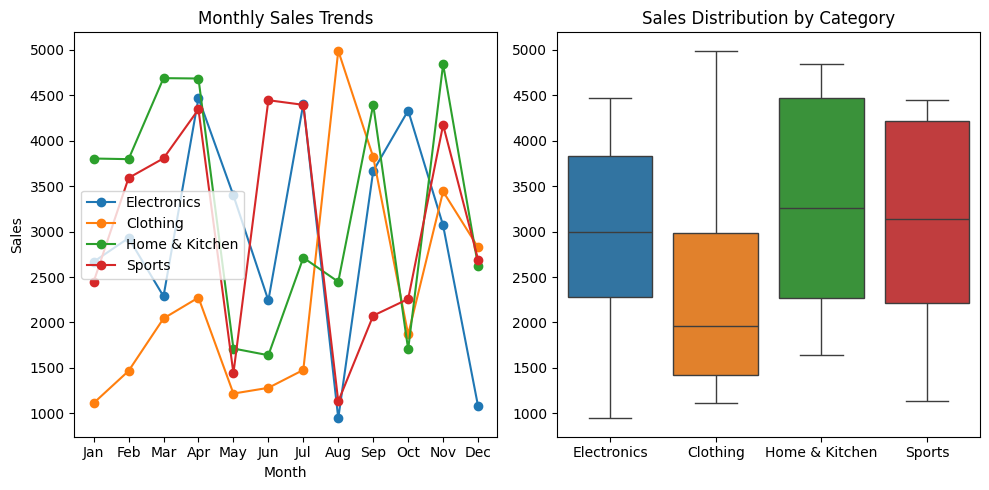

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(1, 2, figsize=(10, 5))

for category in categories:
    axes[0].plot(sales_df.index, sales_df[category], marker='o', label=category)
axes[0].set_xlabel('Month')
axes[0].set_ylabel('Sales')
axes[0].set_title('Monthly Sales Trends')
axes[0].legend()

sns.boxplot(data=sales_df[categories], ax=axes[1])
axes[1].set_title('Sales Distribution by Category')

plt.tight_layout()
plt.show()
